## The Sparks Foundation - Data Science & Business Analytics Internship

### Task 1 - Prediction using Supervised ML

This model uses Linear Regression to predict the percentage of a student based on number of hours studied. 

Steps:

1. Defining the question
2. Importing data
3. Analyzing Data
4. Visualizing Data
5. Build and Training Model
6. Making Predictions
7. Evaluating the Model

### Defining the Question

This model focuses on finding the relationship between the efforts of a student with the result s/he achieves. It is pretty straightforward and the goal is to train a model to predict this relationship. The very first step of any data science problem is to figure out a well defined question. In this case, the question is: 

**How much does the number of hours studied influence the percentage of a student?**

### Importing Data

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
df = pd.read_csv('data.csv')

In [21]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Analyzing Data

In [22]:
df.shape

(25, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [24]:
# Summary statistics for data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
# Check for nulls
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [26]:
# Check for correlations
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualizing Data

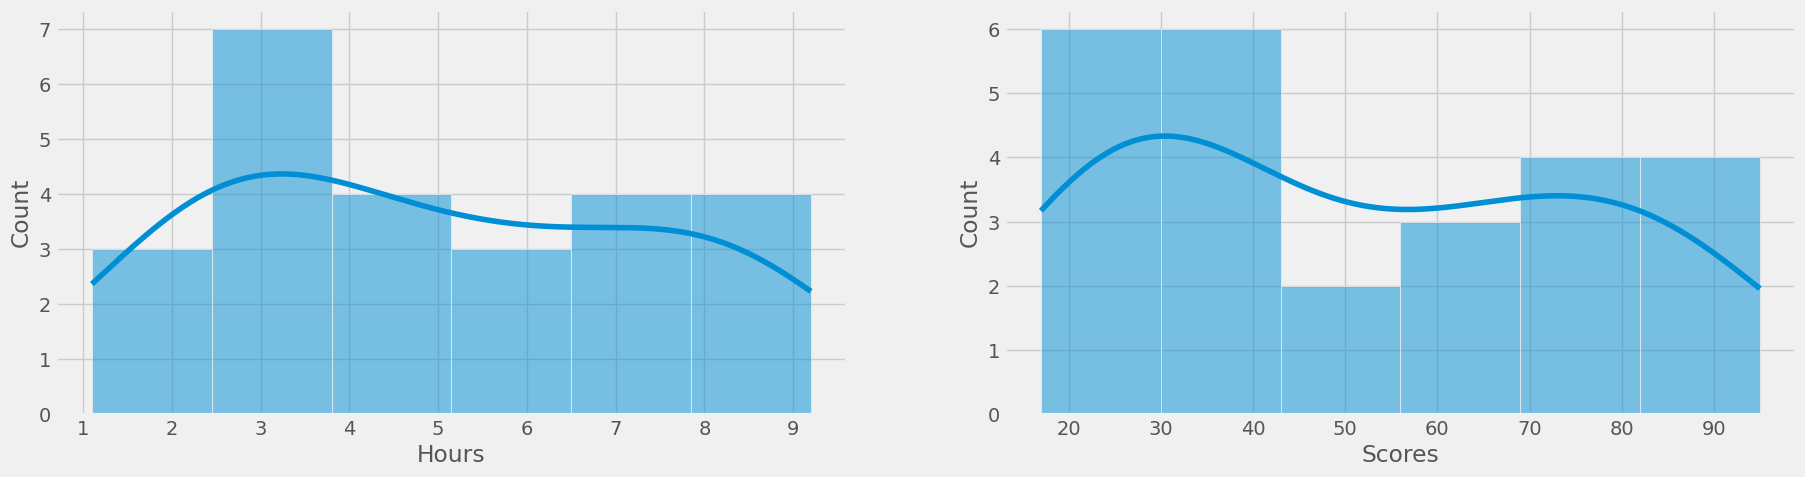

In [27]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'Hours', kde = True)

plt.subplot(1,2,2)
sns.histplot(data = df, x = 'Scores', kde = True)

plt.show()

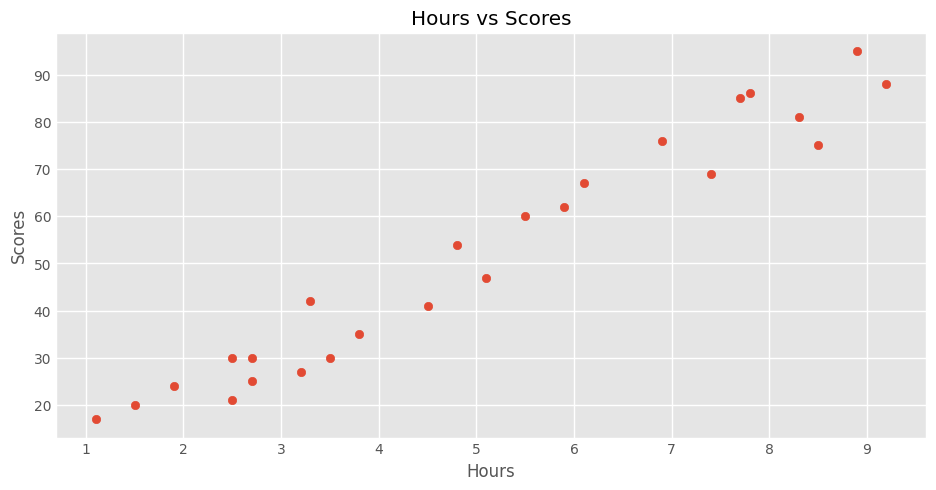

In [28]:
plt.style.use('ggplot')
plt.figure(figsize = [10,5])
plt.scatter(x = df['Hours'], y = df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


From the graphs above, there seems to be a linear relationship between *Hours* and *Scores*. Therefore, we will build our model using the **Linear Regression** algorighm.

### Build and Train Model

In [29]:
# Separating the *feature* and *label*
X = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [30]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [31]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state= 0)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions

In [34]:
y_pred = model.predict(X_test)

In [35]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
print('The predicted percentage for 9.25 hours is %.2f'%(model.predict([[9.25]])))

The predicted percentage for 9.25 hours is 93.69


### Evaluating Model

In [36]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: %.2f"%(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.18
